In [173]:
import pandas as pd
import numpy as np
import os
import acquire
import math
# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

In [2]:
iris=data('iris')
data('iris', show_doc=True)


iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [3]:
#first three rows
df_iris=iris
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#shape
df_iris.shape

(150, 5)

In [5]:
#column names
df_iris.count()

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
Species         150
dtype: int64

In [6]:
#datatpes
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
# print the summary statistics for each of the numeric variables
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

# Make sure that the spreadsheet is publicly visible under your sharing settings.

In [9]:
# sheet_url = 'https://docs.google.com/spreadsheets/d/14het2fxK23FOO6jPAzZlalb__gz6EiZuYpFTDxGuIRA/edit?usp=sharing'    

# csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

# df_googlesheet = pd.read_csv(csv_export_url)
# df_googlesheet.head()

In [10]:
df_googlesheet = pd.read_csv('spreadsheet_exercises_TimK.csv')
df_googlesheet.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,calculated_montly_charges,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Interent_and_Phone
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,True,0,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,Interent_and_Phone
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Interent_and_Phone
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Interent_and_Phone
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Interent_and_Phone


In [11]:
# assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [12]:
df_google_sheets_sample = df_googlesheet.head(100)
df_google_sheets_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                100 non-null    object 
 1   gender                     100 non-null    object 
 2   is_senior_citizen          100 non-null    int64  
 3   partner                    100 non-null    object 
 4   dependents                 100 non-null    object 
 5   phone_service              100 non-null    int64  
 6   internet_service           100 non-null    int64  
 7   contract_type              100 non-null    int64  
 8   payment_type               100 non-null    object 
 9   monthly_charges            100 non-null    float64
 10  total_charges              100 non-null    float64
 11  churn                      100 non-null    object 
 12  tenure                     100 non-null    float64
 13  is_female                  100 non-null    bool   


In [13]:
# print the number of rows of your original dataframe
df_googlesheet.shape

(7049, 26)

In [14]:
# print the first 5 column names
# Select first N columns
# first_n_column  = df.iloc[: , :N]

print(df_googlesheet.iloc[: , :5])

#or df_googlesheet.columns[0:5]

     customer_id  gender  is_senior_citizen partner dependents
0     0002-ORFBO  Female                  0     Yes        Yes
1     0003-MKNFE    Male                  0      No         No
2     0004-TLHLJ    Male                  0      No         No
3     0011-IGKFF    Male                  1     Yes         No
4     0013-EXCHZ  Female                  1     Yes         No
...          ...     ...                ...     ...        ...
7044  9987-LUTYD  Female                  0      No         No
7045  9992-RRAMN    Male                  0     Yes         No
7046  9992-UJOEL    Male                  0      No         No
7047  9993-LHIEB    Male                  0     Yes        Yes
7048  9995-HOTOH    Male                  0     Yes        Yes

[7049 rows x 5 columns]


In [15]:
# print the column names that have a data type of object

In [16]:
df_googlesheet.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn', 'calculated_montly_charges', 'validate', 'phone_service_type',
       'internet_service_type', 'contract_type.1', 'service_type'],
      dtype='object')

In [17]:
# compute the range for each of the numeric variables.
#could use df_googlesheet.select_dtypes(include=['int64', 'float64']).describe()

In [18]:
df_googlesheet.select_dtypes(include=['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_senior_citizen   7049 non-null   int64  
 1   phone_service       7049 non-null   int64  
 2   internet_service    7049 non-null   int64  
 3   contract_type       7049 non-null   int64  
 4   monthly_charges     7049 non-null   float64
 5   total_charges       7038 non-null   float64
 6   tenure              7049 non-null   float64
 7   partner_dependents  7049 non-null   int64  
 8   rounded_tenure      7049 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 495.8 KB


In [19]:
dfgooglesheetrange=(df_googlesheet.select_dtypes(include=['int64', 'float64']).max() - df_googlesheet.select_dtypes(include=['int64', 'float64']).min())
dfgooglesheetrange

is_senior_citizen        1.0
phone_service            2.0
internet_service         2.0
contract_type            2.0
monthly_charges        100.5
total_charges         8666.0
tenure                  79.3
partner_dependents       3.0
rounded_tenure          79.0
dtype: float64

In [20]:
# Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). 
#Read the Table1_CustDetails worksheet into a dataframe named df_excel.







In [21]:
df_excel = pd.read_excel('spreadsheet_exercises.xlsx', index_col=0) 
df_excel.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
customer_id,,,,,,,,,,,,
0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No,9.044207
0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No,9.055092
0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes,3.800406
0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes,12.631122
0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes,3.187128


In [22]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)

In [23]:
# print the number of rows of your original dataframe
df_excel.shape

(7049, 12)

In [24]:
# print the first 5 column names
df_excel.columns[0:5]

Index(['gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service'],
      dtype='object')

In [25]:
# print the column names that have a data type of object
df_excel.select_dtypes(include='object').columns

Index(['gender', 'partner', 'dependents', 'payment_type', 'churn'], dtype='object')

In [26]:
# compute the range for each of the numeric variables.
dfexcelsheetrange=(df_googlesheet.select_dtypes(include=['int64', 'float64']).max() - df_googlesheet.select_dtypes(include=['int64', 'float64']).min())
dfexcelsheetrange

is_senior_citizen        1.0
phone_service            2.0
internet_service         2.0
contract_type            2.0
monthly_charges        100.5
total_charges         8666.0
tenure                  79.3
partner_dependents       3.0
rounded_tenure          79.0
dtype: float64

In [27]:
# https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing

In [28]:
# https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing

In [29]:
import os

In [30]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [31]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [32]:
df_google = pd.read_csv(csv_export_url)
df_google.head()
#ParserError: Error tokenizing data. C error: Expected 12 fields in line 5, saw 13 dont know why

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [34]:
# print the number of rows and columns
df_google.shape

(891, 12)

In [35]:
# print the column names
print(df_google.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [36]:
# print the data type of each column
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
# print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
# print the unique values for each of your categorical variables
df_google.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [39]:
# acquire.py Functions
# Make a function named get_titanic_data that returns the titanic data from the codeup data science database 
# as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [40]:
#function uses info from env.py file to create a connection url to access db

def get_connection(db, user=user, host=host, password=password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [41]:
#titanic data set func
def new_titanic_data():
    sql_query = 'SELECT * FROM passengers'
    #sql query
    df = pd.read_sql(sql_query, get_connection('titanic_db')) 
    #read in data frame
    return df

In [42]:
#reads titanic data from codeup db, writes to a csv file if it doesnt exist and returns a df
def get_titanic_data():
    
    if os.path.isfile('titanic_df.csv'):
        
        df = pd.read_csv('titanic_df.csv', index_col=0)
        #if csv file exists read data in from csv
    
    else:
    #read fresh data from db into df
        
        df = new_titanic_data()
    #wrote df to csv
        
        df.to_csv('titanic_df.csv')
    
    return df
        

In [43]:
titanic_df = get_titanic_data()

In [44]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [45]:
# Make a function named get_iris_data that returns the data from the iris_db on the codeup data science 
# database as a pandas DataFrame. The returned DataFrame should include the actual name of the species in 
# addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [46]:
#reads iris data
def new_iris_data():
    
    sql_query = """
                SELECT
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING (species_id)
                """
    
    #read in df from codeup db
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [47]:
#reads in iris data from db, writes data to csv if no local file exists, returns a df
def get_iris_data():
    
    if os.path.isfile('iris_df.csv'):
        #if csv exists read in data
        df = pd.read_csv('iris_df.csv', index_col=0)
    
    else:
        #read in fresh data from db to df
        df = new_iris_data()
        #cache data
        df.to_csv('iris_df.csv')
        
    return df

In [48]:
iris_df = get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [49]:
# Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, 
# be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and 
# internet service options. Obtain your data from the Codeup Data Science Database.



In [50]:
def new_telco_data():
    
    sql_query = """
                SELECT * FROM customers
                JOIN contract_types using (contract_type_id)
                JOIN internet_service_types using (internet_service_type_id)
                JOIN payment_types using (payment_type_id)
                """
    
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

In [51]:
def get_telco_data():
    
    if os.path.isfile('telco.csv'):
        
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
        
        df = new_telco_data()
        
        df.to_csv('telco.csv')
        
    return df

In [52]:
get_telco_data()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [53]:
# Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to 
# add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, 
# titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas 
# necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [54]:
# Using the Iris Data:

# Use the function defined in acquire.py to load the iris data.

# Drop the species_id and measurement_id columns.

# Rename the species_name column to just species.

# Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice,
# we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.

In [55]:

iris_df = get_iris_data()

In [56]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [57]:
# Drop the species_id and measurement_id columns.
iris_df= iris_df.drop(['species_id'], axis=1)

In [58]:
# Rename the species_name column to just species.
iris_df = iris_df.rename(columns={"species_name": "species"})

In [59]:
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [60]:
# Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice,
# we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
dummy_df = pd.get_dummies(iris_df[['species']],drop_first=[True])
dummy_df

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [61]:
iris_df = pd.concat([iris_df, dummy_df], axis=1)

In [62]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [63]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.

In [64]:
def prep_iris(get_iris_data):
    iris_df = get_iris_data()
    iris_df = iris_df.drop(['species_id'], axis=1)
    iris_df = iris_df.rename(columns={"species_name": "species"})
    dummy_df = pd.get_dummies(iris_df[['species']],drop_first=[True])
    iris_df = pd.concat([iris_df, dummy_df], axis=1)
    return iris_df

In [65]:
prep_iris(get_iris_data)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


In [66]:
# Using the Titanic dataset

# Use the function defined in acquire.py to load the Titanic data.

# Drop any unnecessary, unhelpful, or duplicated columns.

# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above 
# applied.

In [67]:
titanic_df = get_titanic_data()

In [68]:
# Drop any unnecessary, unhelpful, or duplicated columns.

In [69]:
# .dtypes
# .age.value_counts(bins=10, sort=True)
# .embarked.value_counts(dropna=False)
# .drop(columns=['deck'], inplace=True)
# .fillna(np.nan, inplace=True)
# train, test = train_test_split(dft, train_size=.8, random_state=123)
# train.embarked.value_counts(dropna=False)
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [70]:
titanic_df.info()
#180+ null in age, 690+ in deck, 3 in embarked, 3 in embarked town

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [71]:
titanic_df.shape

(891, 13)

In [94]:
titanic_df = titanic_df.drop_duplicates()

In [95]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   passenger_id              891 non-null    int64  
 1   survived                  891 non-null    int64  
 2   pclass                    891 non-null    int64  
 3   sex                       891 non-null    object 
 4   sibsp                     891 non-null    int64  
 5   parch                     891 non-null    int64  
 6   fare                      891 non-null    float64
 7   embark_town               891 non-null    object 
 8   alone                     891 non-null    int64  
 9   sex_male                  891 non-null    uint8  
 10  embark_town_Queenstown    891 non-null    uint8  
 11  embark_town_Southampton   891 non-null    uint8  
 12  embark_town_Southhampton  891 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(4)
memory usage: 73.1+ 

In [93]:
#.describe on the columns that are objects dtype
obj_cols = titanic_df.columns[[titanic_df[col].dtype == 'O' for col in titanic_df.columns]]
obj_cols  

Index(['sex', 'embark_town'], dtype='object')

In [75]:
#value counts for those columns
for col in obj_cols:
    print(titanic_df[col].value_counts())
    print('\n')
    print(titanic_df[col].value_counts(normalize=True, dropna=False))
    print('~~~~~~~')

male      577
female    314
Name: sex, dtype: int64


male      0.647587
female    0.352413
Name: sex, dtype: float64
~~~~~~~
S    644
C    168
Q     77
Name: embarked, dtype: int64


S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
~~~~~~~
Third     491
First     216
Second    184
Name: class, dtype: int64


Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
~~~~~~~
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64


NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
~~~~~~~
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64
~~~~~~~


In [76]:
#bins for fares
titanic_df.fare.value_counts(bins=5, sort=False)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [92]:
titanic_df.isnull().sum()

passenger_id                0
survived                    0
pclass                      0
sex                         0
sibsp                       0
parch                       0
fare                        0
embark_town                 0
alone                       0
sex_male                    0
embark_town_Queenstown      0
embark_town_Southampton     0
embark_town_Southhampton    0
dtype: int64

In [78]:
# Find columns with missing values and the total of missing values.
missing = titanic_df.isnull().sum()
# missing
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [79]:
# are there any duplicates in passenger_id?
titanic_df.passenger_id.nunique()

891

In [80]:
#check and compare after drop duplicates
print(titanic_df.shape)
titanic_df = titanic_df.drop_duplicates()
print(titanic_df.shape)

(891, 13)
(891, 13)


In [81]:
#drop columns with too many missing values; cols with missing...deck, embarked, class, age, check shape.
cols_to_drop =['deck', 'embarked', 'class', 'age']
titanic_df = titanic_df.drop(columns = cols_to_drop)
titanic_df.shape

(891, 9)

In [82]:
# can fill embark_town with most common value, 'Southampton', by using the fillna() function or we could use an imputer.

# Run .fillna() on the entire df.
titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southhampton')

In [83]:
# Validate that missing values in embark_town have been handled.
titanic_df.embark_town.isna().sum()

0

In [84]:
#do we have the right data types
titanic_df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
sibsp             int64
parch             int64
fare            float64
embark_town      object
alone             int64
dtype: object

In [85]:
# Text Normalization?
#

In [86]:
# Tidy Data?
# one column should only represent one variable
# one row should be one observation (passenger)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [87]:
# two ways:

# associate each unique value with a number -- label encoding
# one-hot encoding (get_dummies): turn each unique value into a separate column with either 1 or 0

# Get dummy vars for sex and embark_town

# dummy_na: create a dummy var for na values, also?
# drop_first: drop first dummy var 

In [88]:
pd.get_dummies(titanic_df[['sex','embark_town']], drop_first=True)

,sex_male,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,1,0,1,0
1,0,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,1,0
...,...,...,...,...
886,1,0,1,0
887,0,0,1,0
888,0,0,1,0
889,1,0,0,0


In [90]:
# create dummy variables for 'sex' and 'embark_town'
dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], dummy_na= False, drop_first=[True, True])
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,1,0,1,0
1,0,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,1,0


In [91]:
# Concatenate the dummy_df dataframe above with the titanic_df and validate.
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0


In [96]:
#have an extra embark town south hampton

In [107]:
# Rename Columns?
# No renaming needed at this time.

# Scaling Data?
# You want to scale data when you're using methods based on measures
# of how far apart data points, like support vector machines
# or k-nearest neighbors.

In [113]:
#combine all into function
def clean_data(titanic_df):
    '''
    Clean Data Function
    '''
    titanic_df = titanic_df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic_df = titanic_df.drop(columns=cols_to_drop)
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
    return titanic_df

In [111]:
#test it works

titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [114]:
titanic_df = clean_data(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [115]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sex                      891 non-null    object 
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              891 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_male                 891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 72.2+ KB


In [117]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [118]:
#split data into train and test
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 
train, test = train_test_split(titanic_df, test_size = .2, random_state=123, stratify=titanic_df.survived)

In [119]:
print(train.shape)
print(test.shape)

(712, 12)
(179, 12)


In [120]:
# again split train into train and validate
train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.survived)

In [121]:
# check split
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [128]:
def split_data(titanic_df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(titanic_df, test_size = .2, random_state=123, stratify=titanic_df.survived)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.survived)
    return train, validate, test

In [129]:

titanic_df.shape

(891, 12)

In [130]:
train, validate, test = split_data(titanic_df)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [ ]:
# Strategies for imputing:

# fill with 0
# fill with the average
# fill with the median
# fill with subgroup mean
# fill with most frequent value
# build a model to predict missing values
# We will use sklearn.imputer.SimpleImputer to do this.

# Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
# Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be 
# imputed. Store that value in the imputer object.Transform train: fill missing values in train dataset with that value identified
# Transform validate/test: fill missing values with that value identified. Create the SimpleImputer object, which we will 
# store in the variable imputer. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent).
# Essentially, this is creating the instructions and assigning them to a variable, imputer.

In [132]:
# Define 
imputer = SimpleImputer(strategy='most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

In [134]:
# Fit the imputer to the columns in the training df. This means that the imputer will determine the most_frequent value, 
# or other value depending on the strategy called, for each column.

# fit 
imputer = imputer.fit(train[['embark_town']])
imputer

SimpleImputer(strategy='most_frequent')

In [135]:
# It will store that value in the imputer object to use upon calling transform. 
# We will call transform on our train, validate, and test datasets to fill any missing values.

# Use (i.e transform)

train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])

In [136]:
# Validate that there are no longer any Null values in embark_town.

print(train.embark_town.isnull().sum())
print(validate.embark_town.isnull().sum())
print(test.embark_town.isnull().sum())

0
0
0


In [137]:
# Note: the clean_data() function is already dealing with missing values. If we want to use imputation, 
# we will need to go back and tweak our earlier function.


def impute_mode(train, validate, test):
    '''
    Takes in train, validate, and test, and uses train to id best value to replace nulls in embark_town
    Imputes that value into all three sets and returns all three sets
    '''
    imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

In [138]:
# all together
def prep_titanic_data(titanic_df):
    '''
    Cleansed and Prepped
    '''
    titanic_df = clean_data(titanic_df)
    train, validate, test = split_data(titanic_df)
    return train, validate, test

In [140]:
# validate with fresh data
titanic_df = acquire.get_titanic_data()

In [141]:
# Run final prepare function and validate that the function is working properly.
train, validate, test = prep_titanic_data(titanic_df)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sex                      534 non-null    object 
 4   sibsp                    534 non-null    int64  
 5   parch                    534 non-null    int64  
 6   fare                     534 non-null    float64
 7   embark_town              534 non-null    object 
 8   alone                    534 non-null    int64  
 9   sex_male                 534 non-null    uint8  
 10  embark_town_Queenstown   534 non-null    uint8  
 11  embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 43.3+ KB


In [ ]:
# Using the Telco dataset

# Use the function defined in acquire.py to load the Telco data.

# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [143]:
acquire.get_telco_data()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [145]:
raw_data = get_telco_data()
raw_data.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [146]:
raw_data.shape

(7043, 24)

In [147]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [148]:
pd.crosstab(raw_data.internet_service_type_id, raw_data.internet_service_type)

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [149]:
pd.crosstab(raw_data.contract_type_id, raw_data.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [150]:
pd.crosstab(raw_data.payment_type_id, raw_data.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [151]:
df = raw_data.copy()

In [152]:
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)


In [153]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [154]:
#total charges is object
df['total_charges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [155]:
df[df.total_charges == ' ']

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1731,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
1906,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2025,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
2176,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
2250,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
2855,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
3052,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
3118,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
4054,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check


In [156]:
#customers with zero tenure have no toal charges
df[df.tenure == 0]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
945,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
1731,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
1906,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
2025,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No,One year,None,Mailed check
2176,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
2250,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
2855,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
3052,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
3118,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
4054,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check


In [157]:
df['total_charges'] = df['total_charges'].str.strip()

In [158]:
df = df[df.total_charges != '']

In [159]:
# Confirm rows were dropped
df[df.tenure == 0]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [160]:
# convert 
df['total_charges'] = df.total_charges.astype(float)

In [161]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


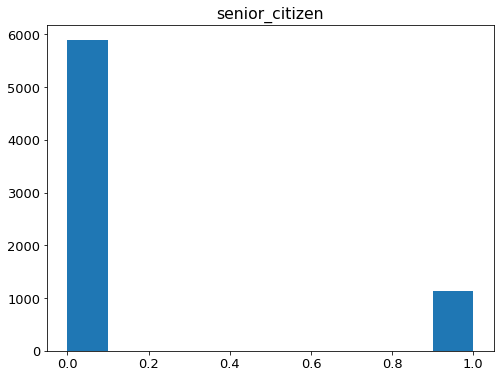

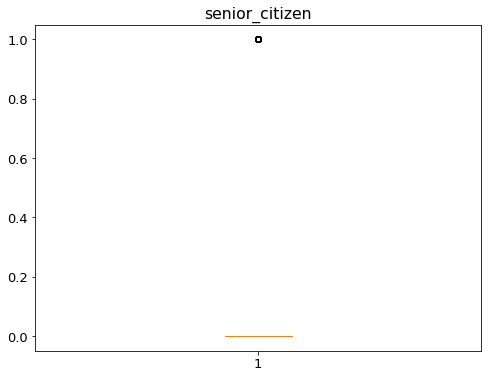

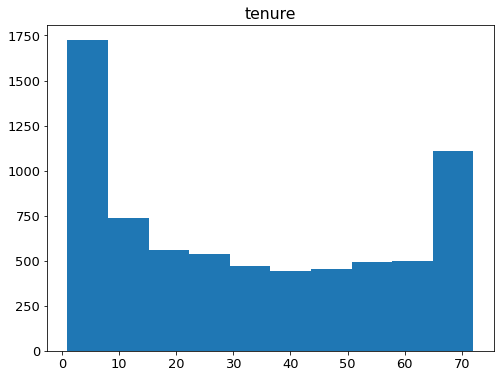

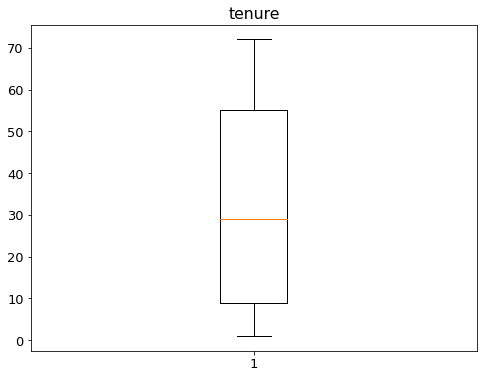

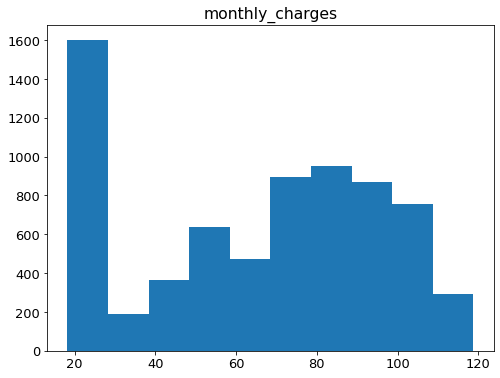

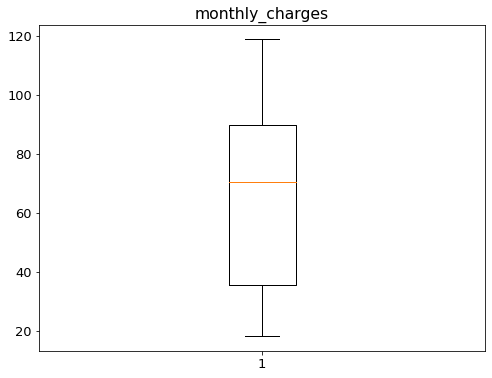

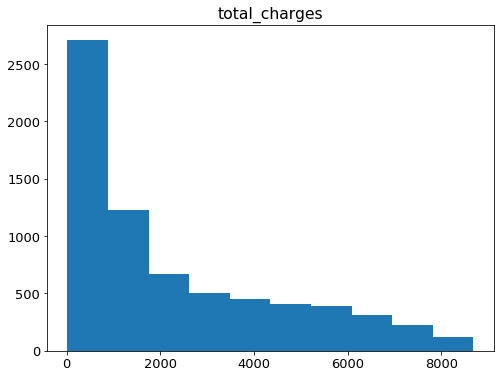

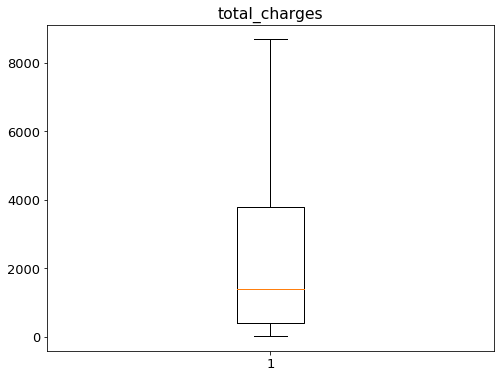

In [162]:
# Plot numeric columns
num_cols = df.columns[[(df[col].dtype == 'int64') or (df[col].dtype == 'float64') for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [163]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'contract_type', 'internet_service_type', 'payment_type'],
      dtype='object')

In [164]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

GENDER
Count:
Male      3549
Female    3483
Name: gender, dtype: int64


Proportions:
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
--------------------------


PARTNER
Count:
No     3639
Yes    3393
Name: partner, dtype: int64


Proportions:
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2099
Name: dependents, dtype: int64


Proportions:
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64
--------------------------


PHONE_SERVICE
Count:
Yes    6352
No      680
Name: phone_service, dtype: int64


Proportions:
Yes    0.903299
No     0.096701
Name: phone_service, dtype: float64
--------------------------


MULTIPLE_LINES
Count:
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64


Proportions:
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiple_lines, dtype: float64
-

In [165]:
# encode binary categorical variables into numeric values
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [166]:
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
dummy_df

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7039,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7040,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [167]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
#  
# think about whether any of these should be used (do they actually supply 
# new information not already represented by the existing fields?) and if they 
# need to be one-hot encoded if kept.

In [169]:
# encode number_relationships by utilizing information from dependents_encoded and partner_encoded
df['number_relationships'] = df['dependents_encoded'] + df['partner_encoded']

In [170]:
# create some new columns
df['online_backup_bool'] = df.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 0}) 
df['online_security_bool'] = df.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [171]:
# encode number_online_services by utilizing information from online_security_encoded and online_backup_encoded
df['number_online_services'] = df['online_security_bool'] + df['online_backup_bool']

In [174]:
# encode tenure in years (rounded down) by utilizing information from tenure (currently stored in months)
df['yearly_tenure'] = df.tenure.apply(lambda x: math.floor(x/12))

In [175]:
# encode has_internet
df['has_internet'] = df.internet_service_type.apply(lambda x: 0 if x == 'None' else 1)

In [ ]:
#splitting

In [176]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

In [177]:
train.shape

(3937, 53)

In [178]:
validate.shape

(1688, 53)

In [179]:
test.shape

(1407, 53)

In [180]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.2, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [181]:
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco_data(df)
    
    return train, validate, test

In [ ]:
#.describe on the columns that are objects dtype
obj_cols = titanic_df.columns[[titanic_df[col].dtype == 'O' for col in titanic_df.columns]]
obj_cols  